# Установка нужных библиотек

In [85]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install numpy
#!pip install scikit-learn
#!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 6.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.6 MB 6.2 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 6.3 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 6.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 6.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.6 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.6 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ----------------

# Импорт нужных библиотек

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных

In [13]:
df = pd.read_csv("Employee.csv")

# Общая информация

In [12]:
print("Размер датасета:", df.shape)
print("\n Типы данных и количество непустых значений:")
print(df.info())

Размер датасета: (4653, 9)

 Типы данных и количество непустых значений:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


# Первые строки датасета

In [15]:
print(df.head())


 Первые строки датасета:
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


# Признаки и что они значат

<h3>1. Education - образование сотрудника</h3>
<h3>2. JoiningYear - год начала работы в компании</h3>
<h3>3. City - город работы</h3>
<h3>4. PaymentTier - уровень зарплаты (1 - высокий, 2 - средний, 3 - низкий)</h3>
<h3>5. Age - возраст</h3>
<h3>6. Gender - пол</h3>
<h3>7. EverBenched - был ли сотрудник когда-нибудь отстранён от работы (1 - да, 2 - нет)</h3>
<h3>8. ExperienceInCurrentDomain - опыт (в годах)</h3>
<h3>9. LeaveOrNot - целевая переменная (1 - уволился, 2 - остался)</h3>

# Описательная статистика

In [16]:
print(df.describe())

       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


# Проверка пропущенных значений

In [17]:
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


# Уникальные значения для категориальных признаков

In [45]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Education: ['Bachelors' 'Masters' 'PHD']
City: ['Bangalore' 'Pune' 'New Delhi']
Gender: ['Male' 'Female']
EverBenched: ['No' 'Yes']


In [57]:
# Ручное кодирование признаков
df["Education"] = df["Education"].map({"PHD": 1, "Masters": 2, "Bachelors": 3})
df["City"]      = df["City"].map({"Bangalore": 1, "Pune": 2, "New Delhi": 3})
df["Gender"]    = df["Gender"].map({"Male": 1, "Female": 0})
df["EverBenched"] = df["EverBenched"].map({"Yes": 1, "No": 0})

# Стиль графиков

In [58]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Распределение целевой переменной

<h3>Посмотрим, сбалансирована ли целевая переменная — уволилось ли примерно одинаковое количество сотрудников по сравнению с теми, кто остался.</h3>
<h3>Сначала выведем график, а потом посчитаем точные числа</h3>

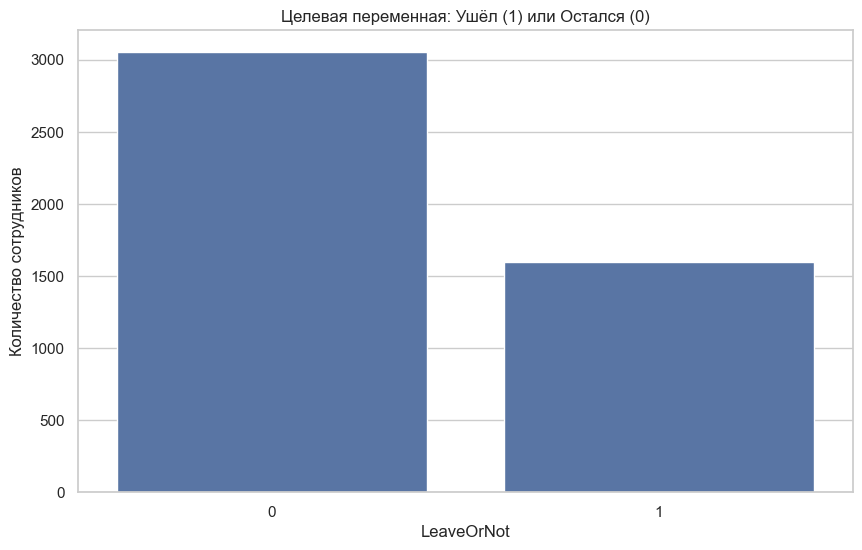

In [59]:
sns.countplot(x="LeaveOrNot", data=df)
plt.title("Целевая переменная: Ушёл (1) или Остался (0)")
plt.xlabel("LeaveOrNot")
plt.ylabel("Количество сотрудников")
plt.show()

In [60]:
target_counts = df["LeaveOrNot"].value_counts()
target_percent = df["LeaveOrNot"].value_counts(normalize=True) * 100

print("Количество сотрудников по классам:")
print(target_counts)
print("\nПроценты по классам (в %):")
print(target_percent.round(2))

Количество сотрудников по классам:
LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

Проценты по классам (в %):
LeaveOrNot
0    65.61
1    34.39
Name: proportion, dtype: float64


# Вывод
<h3>Данные несбалансированы: около 34% сотрудников уволились.</h3>
<h3>Возможно, стоит учесть это при выборе метрик</h3>

# Возраст может влиять на решение уволиться. 
# Посмотрим, как он распределён.

Распределение возраста сотрудников:


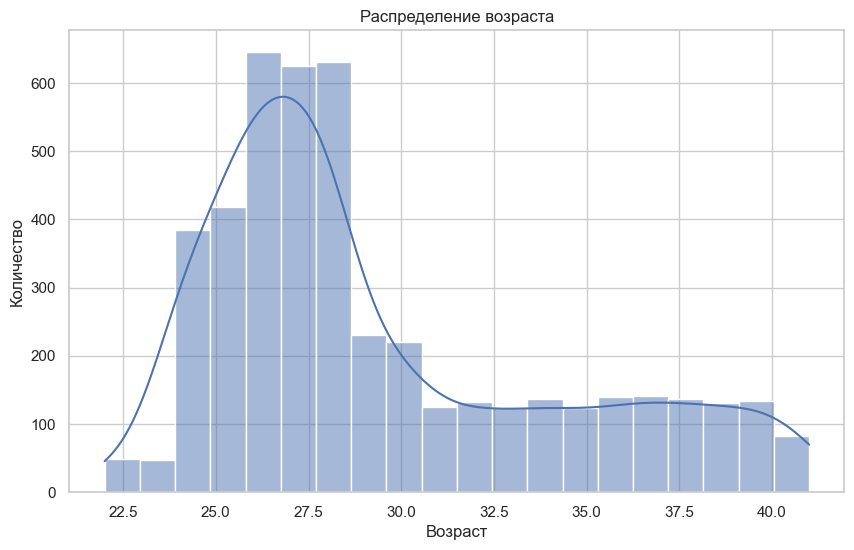

In [61]:
print("Распределение возраста сотрудников:")
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

# Вывод
<h3>Большинство сотрудников находятся в возрасте от 25 до 35 лет.</h3>
<h3>Распределение имеет левостороннюю асимметрию.</h3>

# Boxplot: возраст vs уход

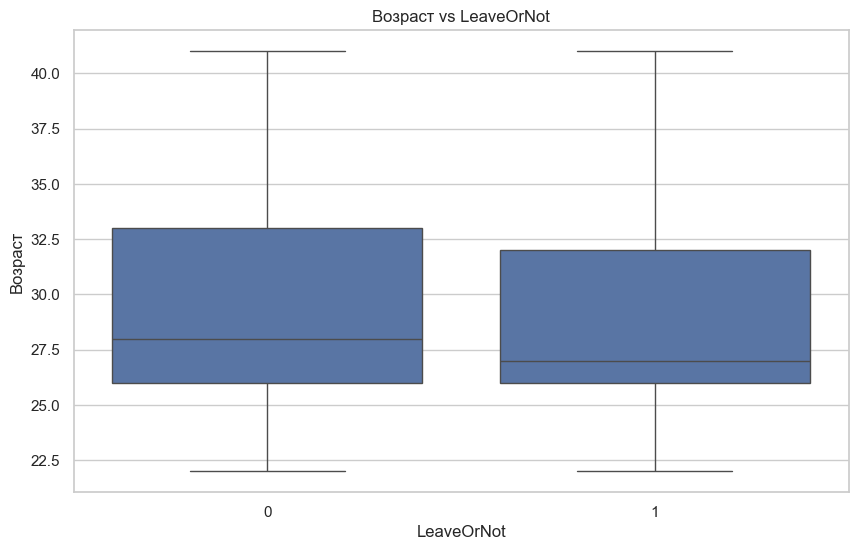

In [62]:
sns.boxplot(x="LeaveOrNot", y="Age", data=df)
plt.title("Возраст vs LeaveOrNot")
plt.xlabel("LeaveOrNot")
plt.ylabel("Возраст")
plt.show()

# Вывод
<h3>Разница в возрасте между группами есть, но небольшая. Молодые сотрудники немного чаще увольняются, однако нельзя сказать, что возраст — ключевой фактор.</h3>

# Распределение по городам и уходу

Города и уровень увольнений:


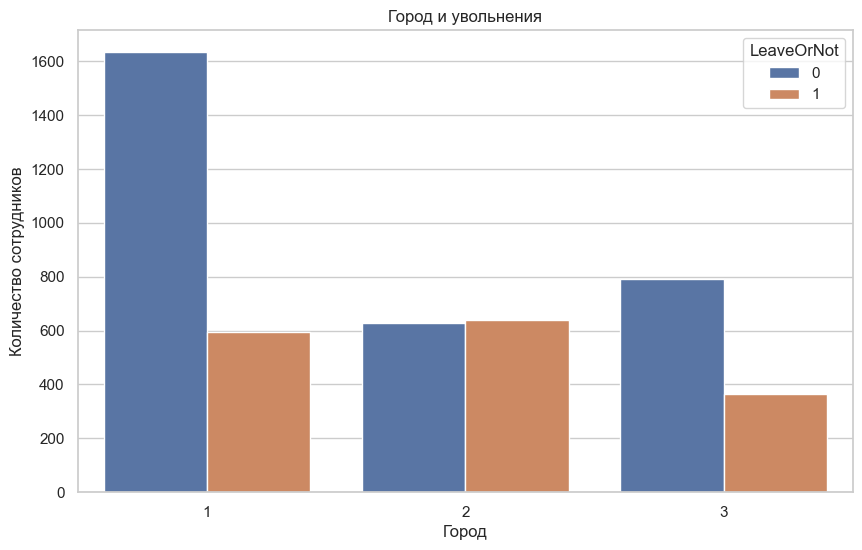

In [63]:
print("Города и уровень увольнений:")
sns.countplot(x="City", hue="LeaveOrNot", data=df)
plt.title("Город и увольнения")
plt.xlabel("Город")
plt.ylabel("Количество сотрудников")
plt.show()

# Вывод
<h3>В Пунe доля уволившихся выше, чем в других городах. Это потенциально важный фактор</h3>

# Проверка корреляции между числовыми признаками и таргетом

Корреляция числовых признаков с LeaveOrNot:


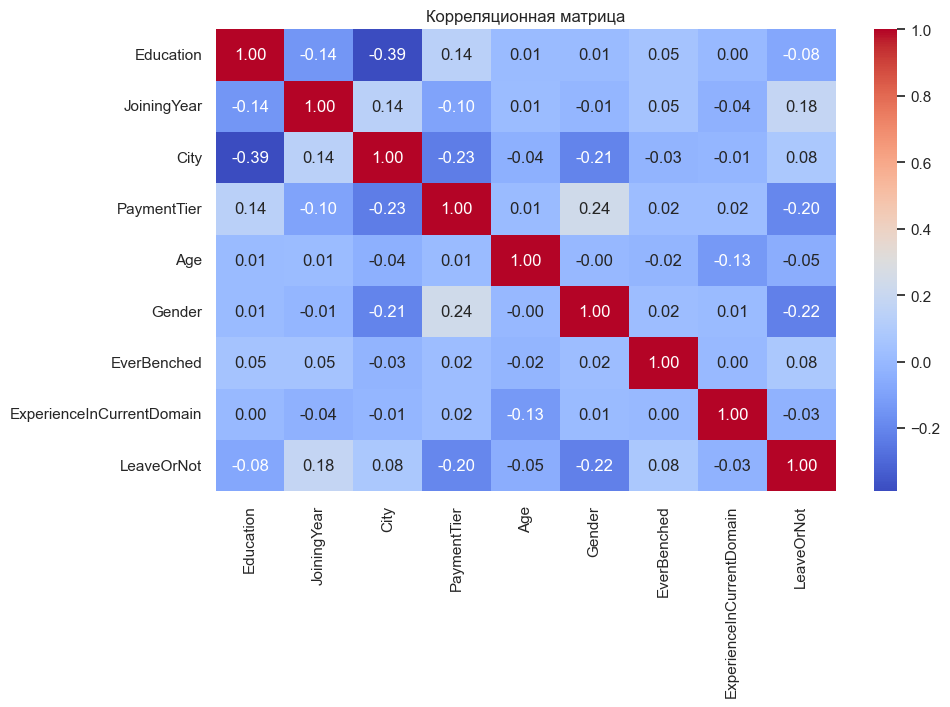

In [64]:
print("Корреляция числовых признаков с LeaveOrNot:")
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

# Вывод
<h2>Корреляция с LeaveOrNot</h2>
<h3>1. JoiningYear (0.18):
чем позже пришёл сотрудник, тем больше вероятность, что он уйдёт. То есть новички менее лояльны.</h3>
<h3>2. PaymentTier (–0.20):
чем выше платёжный уровень (1 — самый высокий), тем меньше вероятность увольнения.</h3>
<h3>3. Gender (-0.22):
мужчины (1) чаще остаются, женщины (0) чаще уходят.</h3>
<h3>4. Education (-0.08):
люди с более высоким образованием (PHD=1) чуть чаще остаются, но связь слабая.</h3>
<h3>5. EverBenched (0.08):
те, кого отстраняли от работы, чуть чаще увольнялись, но эффект слабый.</h3>
<h3>6. City (0.08):
незначительная зависимость от города.</h3>
<h3>7. Age (-0.05):
более молодые сотрудники немного чаще увольняются.</h3>
<h3>8. ExperienceInCurrentDomain (-0.03):
немного уменьшается шанс ухода при увеличении стажа работы.</h3>
<br>
<h2>Корреляция с Education</h2>
<h3>1. City (-0.39):
количество людей с более высоким образованием разнится от города к городу.</h3>
<h3>2. JoiningYear (-0.14):
те, кто присоединился раньше, имели более высокое образование.</h3>
<h3>3. PaymentTier (0.14):
люди с более высоким образованием чуть чаще получают лучшую оплату.</h3>

<br>
<h2>Корреляция с Gender</h2>
<h3>1. City (-0.21):
женщины сконцентрированы в одном городе.</h3>
<h3>2. PaymentTier (0.24):
мужчины имеют большую зарплату.</h3>

<br>
<h2>Корреляция с Age</h2>
<h3>ExperienceInDomain (-0.13):
неожиданный результат - с возрастом опыт в профессиональной сфере растёт не особо. Видимо, сотрудники переквалифицируются</h3>

# Создадим новые признаки при помощи библиотеки и выведем те, которые лучше всего коррелируют с таргетом

In [80]:
df_fe = df.copy()

In [113]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

num_cols = ["Education", "JoiningYear", "PaymentTier", "Age",
            "Gender", "EverBenched", "ExperienceInCurrentDomain", "City"]

X_num = df_fe[num_cols]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_num)
poly_features = pd.DataFrame(
    X_poly,
    columns=poly.get_feature_names_out(num_cols),
    index=df_fe.index
)

df_poly = pd.concat([poly_features, df_fe["LeaveOrNot"]], axis=1)
corrs = df_poly.corr()["LeaveOrNot"].abs().sort_values(ascending=False)

new_feats = [f for f in corrs.index 
             if f not in num_cols + ["LeaveOrNot"]][:5]

print("Лучшие новые признаки по корреляции с таргетом:")
for feat in new_feats:
    print(f"{feat:40} corr = {corrs[feat]:.3f}")

Лучшие новые признаки по корреляции с таргетом:
Education Gender                         corr = 0.252
Age Gender                               corr = 0.224
PaymentTier Gender                       corr = 0.221
JoiningYear Gender                       corr = 0.220
Education PaymentTier                    corr = 0.204


# Узнаем, улучшатся ли метрики с новыми признаками: для этого сравним показания метрик без новых признаков и с ними

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

base_features = ['Education', 'JoiningYear', 'City', 'PaymentTier',
                 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']

X_base = df_fe[base_features]
y = df_fe["LeaveOrNot"]

X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

clf_base = RandomForestClassifier(random_state=42)
clf_base.fit(X_train, y_train)

y_pred = clf_base.predict(X_test)
print("Без новых признаков:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, clf_base.predict_proba(X_test)[:,1]))

Без новых признаков:
Accuracy: 0.8506981740064447
F1: 0.7694859038142621
ROC AUC: 0.8749144578928554


In [115]:
df_fe["Education_Gender"]        = df_fe["Education"] * df_fe["Gender"]
df_fe["Age_Gender"]              = df_fe["Age"] * df_fe["Gender"]
df_fe["PaymentTier_Gender"]      = df_fe["PaymentTier"] * df_fe["Gender"]
df_fe["JoiningYear_Gender"]      = df_fe["JoiningYear"] * df_fe["Gender"]
df_fe["Education_PaymentTier"]   = df_fe["Education"] * df_fe["PaymentTier"]

new_features = base_features + ["Education_Gender", "Age_Gender", "PaymentTier_Gender", "JoiningYear_Gender", "Education_PaymentTier"]
X_new = df_fe[new_features]

# Делим и обучаем
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
clf_new = RandomForestClassifier(random_state=42)
clf_new.fit(X_train_new, y_train)

# Оценка
y_pred_new = clf_new.predict(X_test_new)
print("С новыми признаками:")
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("F1:", f1_score(y_test, y_pred_new))
print("ROC AUC:", roc_auc_score(y_test, clf_new.predict_proba(X_test_new)[:,1]))

С новыми признаками:
Accuracy: 0.8560687432867884
F1: 0.7796052631578947
ROC AUC: 0.8812241458556763


# Как видим, метрики улучшились, соответственно целесообразно их оставить

# Feature Importances
<h3>Проверим важность признаков для Random Forest</h3>

In [108]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

base_features = [
    "Education", "JoiningYear", "City", "PaymentTier",
    "Age", "Gender", "EverBenched", "ExperienceInCurrentDomain"
]

interactions = [
    "Education_Gender",
    "Age_Gender",
    "PaymentTier_Gender",
    "JoiningYear_Gender",
    "Education_PaymentTier"
]

X = df_fe[base_features + interactions]
y = df_fe["LeaveOrNot"]

model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X, y)

feat_imp = (
    pd.Series(model.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)

print("Feature Importances (с новыми признаками):\n")
for feat, imp in feat_imp.items():
    print(f"{feat:25} {imp:.4f}")

Feature Importances (с новыми признаками):

JoiningYear               0.2341
City                      0.1238
Age                       0.1219
JoiningYear_Gender        0.0951
Education_PaymentTier     0.0920
ExperienceInCurrentDomain 0.0868
Age_Gender                0.0606
PaymentTier               0.0487
Education_Gender          0.0459
Education                 0.0406
EverBenched               0.0205
PaymentTier_Gender        0.0200
Gender                    0.0099


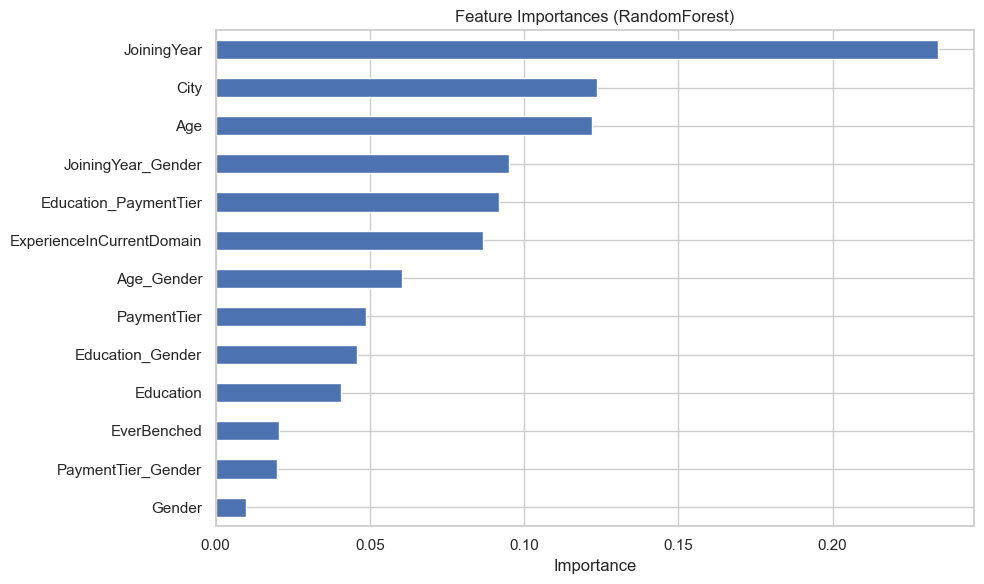

In [107]:
plt.figure(figsize=(10, 6))
feat_imp.sort_values().plot(kind="barh")
plt.title("Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Вывод
<h3>Видим, что Joining Year (0.2341) — самый значимый фактор</h3>
<h3>City (0.1238) и Age (0.1219) также играют заметную роль</h3>
<br>
<h2>Новые признаки</h2>
<h3>JoiningYear_Gender (0.0951) — сочетание пола и года вступления оказалось более информативным, чем сам Gender</h3>
<h3>Education_PaymentTier (0.0920) — видно, что соотношение образования и уровня оплаты даёт полезную информацию</h3>
<h3>Age_Gender (0.0606) — возраст в связке с полом тоже вносит вклад</h3>